**Material Classification for clean energy applications** <br>
New materials need to be synthezied and characterized for improving existing clean energy applications. Your task is to predict the material classes based on thier given molecular properties. Your goal in this project to think like a data scientist and to achieve highest accuracy of classification.
You have been provided with two excel files. First file contains the molecular properties of the materials. Second file lists the classes of the material. Do data preprocessing if necessary at any step, always use a random seed wherever you can and describe your methods and results in detail. All plots should have labels and legends. 
Complete the tasks below (100 points):


1.   **Data Visualization and Unsupervised Classification** : Visualize the data and implement PCA and K-means to see if you can separate different classes. Report your findings. (10)
2.   **Classification of materials**: Implement Decision tree classifier, Random Forest (RF) and KNN classifier on the dataset and estimate the accuracies, F-1 score and confusion matrix. Report which classifier performs the best. Also use the features from the pca and k-means implementation in (1) to see if that improves the classification results. (20)
3.   **Hyper-parameter tuning**: Implement hyperparameter tuning on random forest and KNN algorithms. Report the best performing model and the respective hyperparameters with highest accuracy. (20)
4. **Most important features**: Not all features contribute to the classification accuracy equally. Estimate the order of best performing features. Repeat the classification task with including different number of features in your RF classifier and report how accuracy is changing (10)
5. **XGBoost** : XGBoost is a python ML library that uses optimized gradient boosted trees and has been really successful in completing many ML tasks. Implement XGBoost on the data. Perform hyper-parameter tuning and report the highest accuracy you acheive. (20)
6. **Neural Networks**: In the era of generative AI, which is powered by neural networks, lets see how neural nets perform compared to other ML classification models. Implement a neural network to predict the class (you can use keras, tensorflow or pytorch). Play with changing the number of layers and nodes per layers to see if you can increase the classification accuracy. (20)



In [30]:
!pip install xgboost
!pip install scikit-learn
!pip install --upgrade scikit-learn

In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


1.   **Data Visualization and Unsupervised Classification** : Visualize the data and implement PCA and K-means to see if you can separate different classes. Report your findings. (10)




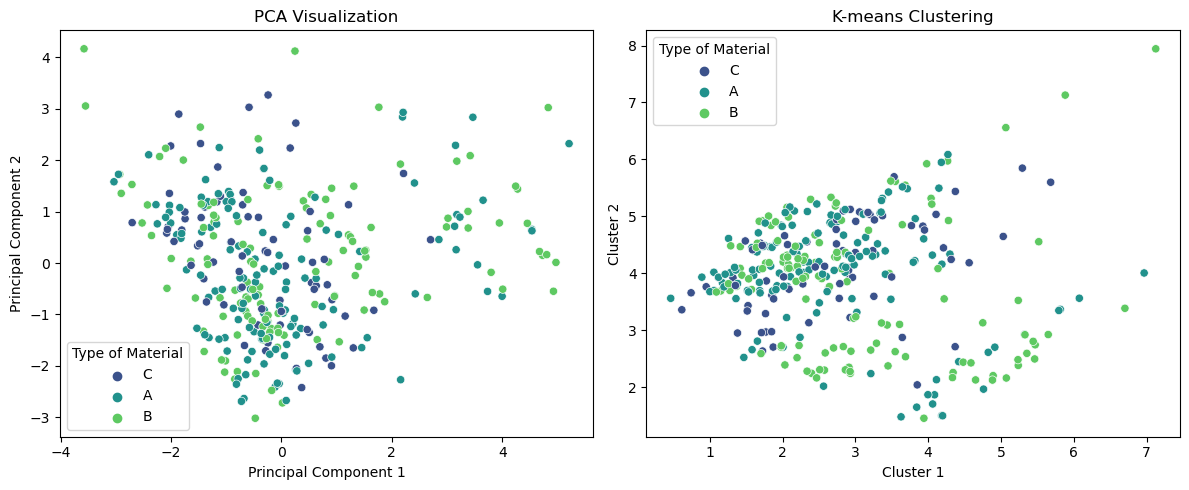

In [32]:
# Loading the data
properties_df = pd.read_csv('features.csv')
classes_df = pd.read_csv('target.csv')

# Display the first few rows of each dataset to understand the structure
#print("Molecular Properties:")
#print(properties_df.head())

#print("\nMaterial Classes:")
#print(classes_df.head())

# Merge the two datasets on a common column if needed
merged_df = pd.merge(properties_df, classes_df, left_index=True, right_index=True, how="inner")
#pd.set_option('display.max_rows', None)
#print(merged_df)

# Extract features and labels
X = merged_df.drop('Type of Material', axis=1)
y = merged_df['Type of Material']

# Standardize the features if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
X_kmeans = kmeans.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot K-means
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_kmeans[:, 0], y=X_kmeans[:, 1], hue=y, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Cluster 1')
plt.ylabel('Cluster 2')

plt.tight_layout()
plt.show()




2.   **Classification of materials**: Implement Decision tree classifier, Random Forest (RF) and KNN classifier on the dataset and estimate the accuracies, F-1 score and confusion matrix. Report which classifier performs the best. Also use the features from the pca and k-means implementation in (1) to see if that improves the classification results. (20)


In [33]:
# Define the evaluate_classifier function
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"\nResults for {classifier_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Split the data into training and testing sets
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Decision Tree Classifier on PCA features
dt_classifier_pca = DecisionTreeClassifier(random_state=42)
dt_classifier_pca.fit(X_pca_train, y_train)
y_pred_dt_pca = dt_classifier_pca.predict(X_pca_test)

# Random Forest Classifier on PCA features
rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_pca_train, y_train)
y_pred_rf_pca = rf_classifier_pca.predict(X_pca_test)

# KNN Classifier on PCA features
knn_classifier_pca = KNeighborsClassifier()
knn_classifier_pca.fit(X_pca_train, y_train)
y_pred_knn_pca = knn_classifier_pca.predict(X_pca_test)

# Evaluate classifiers on PCA features
evaluate_classifier(y_test, y_pred_dt_pca, "Decision Tree (PCA)")
evaluate_classifier(y_test, y_pred_rf_pca, "Random Forest (PCA)")
evaluate_classifier(y_test, y_pred_knn_pca, "KNN (PCA)")



Results for Decision Tree (PCA):
Accuracy: 0.35
F1 Score: 0.38
Confusion Matrix:
[[11  8  6]
 [ 9 12 12]
 [ 5  4  1]]

Results for Random Forest (PCA):
Accuracy: 0.41
F1 Score: 0.41
Confusion Matrix:
[[14  8  3]
 [13 12  8]
 [ 6  2  2]]

Results for KNN (PCA):
Accuracy: 0.38
F1 Score: 0.39
Confusion Matrix:
[[11  9  5]
 [18 12  3]
 [ 5  2  3]]




3.   **Hyper-parameter tuning**: Implement hyperparameter tuning on random forest and KNN algorithms. Report the best performing model and the respective hyperparameters with highest accuracy. (20)




In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model
y_pred_rf_tuned = best_model_rf.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

# KNN Classifier with Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and model
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

# Evaluate the best KNN model
y_pred_knn_tuned = best_model_knn.predict(X_test)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)

# Report the results
print("\nResults for Random Forest after Hyperparameter Tuning:")
print(f"Best Parameters: {best_params_rf}")
print(f"Accuracy: {accuracy_rf_tuned:.2f}")

print("\nResults for KNN after Hyperparameter Tuning:")
print(f"Best Parameters: {best_params_knn}")
print(f"Accuracy: {accuracy_knn_tuned:.2f}")


Results for Random Forest after Hyperparameter Tuning:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.90

Results for KNN after Hyperparameter Tuning:
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.79



4. **Most important features**: Not all features contribute to the classification accuracy equally. Estimate the order of best performing features. Repeat the classification task with including different number of features in your RF classifier and report how accuracy is changing (10)


In [35]:
# Feature Importance Analysis for Random Forest
feature_importances = best_model_rf.feature_importances_

# Sort features by their importance in descending order
sorted_feature_indices = feature_importances.argsort()[::-1]

# Display feature importance scores and corresponding feature names
print("\nFeature Importance Scores:")
for i, feature_index in enumerate(sorted_feature_indices):
    print(f"{X.columns[feature_index]}: {feature_importances[feature_index]:.4f}")

# Repeat the classification task with different numbers of features
num_features_to_include = [1, 2, 3, 4, 5, 6, 7, 8]  # Changing this list based on total number of features

for num_features in num_features_to_include:
    # Select the top 'num_features' important features
    selected_features_indices = sorted_feature_indices[:num_features]
    
    # Train Random Forest classifier with selected features
    rf_classifier_selected_features = RandomForestClassifier(random_state=42)
    rf_classifier_selected_features.fit(X_train[:, selected_features_indices], y_train)

    # Evaluate the classifier on the test set
    y_pred_rf_selected_features = rf_classifier_selected_features.predict(X_test[:, selected_features_indices])
    accuracy_rf_selected_features = accuracy_score(y_test, y_pred_rf_selected_features)

    # Report the results
    print(f"\nResults for Random Forest with {num_features} features:")
    print(f"Selected Features: {X.columns[selected_features_indices].tolist()}")
    print(f"Accuracy: {accuracy_rf_selected_features:.2f}")




Feature Importance Scores:
symmetry group: 0.4005
Unit Volume : 0.1323
DeltaE(eV): 0.1007
Formation Energy (eV): 0.0970
Num_atoms: 0.0920
Material Density(gm/cc): 0.0893
deltaE_Hull(eV): 0.0790
Band Presence : 0.0091

Results for Random Forest with 1 features:
Selected Features: ['symmetry group']
Accuracy: 0.97

Results for Random Forest with 2 features:
Selected Features: ['symmetry group', 'Unit Volume ']
Accuracy: 0.96

Results for Random Forest with 3 features:
Selected Features: ['symmetry group', 'Unit Volume ', 'DeltaE(eV)']
Accuracy: 0.90

Results for Random Forest with 4 features:
Selected Features: ['symmetry group', 'Unit Volume ', 'DeltaE(eV)', 'Formation Energy (eV)']
Accuracy: 0.93

Results for Random Forest with 5 features:
Selected Features: ['symmetry group', 'Unit Volume ', 'DeltaE(eV)', 'Formation Energy (eV)', 'Num_atoms']
Accuracy: 0.93

Results for Random Forest with 6 features:
Selected Features: ['symmetry group', 'Unit Volume ', 'DeltaE(eV)', 'Formation Energ


5. **XGBoost** : XGBoost is a python ML library that uses optimized gradient boosted trees and has been really successful in completing many ML tasks. Implement XGBoost on the data. Perform hyper-parameter tuning and report the highest accuracy you acheive. (20)



In [36]:
# Define the hyperparameter grid for XGBoost


param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150]
}

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost Classifier with Hyperparameter Tuning
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train_encoded)

# Get the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the best XGBoost model
y_pred_xgb_tuned = best_model_xgb.predict(X_test)
accuracy_xgb_tuned = accuracy_score(y_test_encoded, y_pred_xgb_tuned)

# Report the results
print("\nResults for XGBoost after Hyperparameter Tuning:")
print(f"Best Parameters: {best_params_xgb}")
print(f"Accuracy: {accuracy_xgb_tuned:.2f}")



Results for XGBoost after Hyperparameter Tuning:
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 1.00



6. **Neural Networks**: In the era of generative AI, which is powered by neural networks, lets see how neural nets perform compared to other ML classification models. Implement a neural network to predict the class (you can use keras, tensorflow or pytorch). Play with changing the number of layers and nodes per layers to see if you can increase the classification accuracy. (20)



In [37]:
# Encode target variable
y_train_onehot = to_categorical(label_encoder.fit_transform(y_train))
y_test_onehot = to_categorical(label_encoder.transform(y_test))

# Neural Network Model
def create_nn_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Neural Network
input_dim = X_train.shape[1]
output_dim = len(label_encoder.classes_)
nn_model = create_nn_model(input_dim, output_dim)
nn_model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate Neural Network
y_pred_nn_prob = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn_prob, axis=-1)
accuracy_nn = accuracy_score(label_encoder.transform(y_test), y_pred_nn)

# Report the results
print("\nResults for Neural Network:")
print(f"Accuracy: {accuracy_nn:.2f}")


Epoch 1/10
7/7 - 1s - loss: 1.1612 - accuracy: 0.3009 - val_loss: 1.1474 - val_accuracy: 0.3818 - 932ms/epoch - 133ms/step
Epoch 2/10
7/7 - 0s - loss: 1.0780 - accuracy: 0.4398 - val_loss: 1.0574 - val_accuracy: 0.4182 - 46ms/epoch - 7ms/step
Epoch 3/10
7/7 - 0s - loss: 1.0277 - accuracy: 0.4630 - val_loss: 1.0028 - val_accuracy: 0.4909 - 45ms/epoch - 6ms/step
Epoch 4/10
7/7 - 0s - loss: 0.9935 - accuracy: 0.5093 - val_loss: 0.9736 - val_accuracy: 0.5091 - 45ms/epoch - 6ms/step
Epoch 5/10
7/7 - 0s - loss: 0.9654 - accuracy: 0.5231 - val_loss: 0.9502 - val_accuracy: 0.5273 - 48ms/epoch - 7ms/step
Epoch 6/10
7/7 - 0s - loss: 0.9425 - accuracy: 0.5463 - val_loss: 0.9342 - val_accuracy: 0.5636 - 47ms/epoch - 7ms/step
Epoch 7/10
7/7 - 0s - loss: 0.9226 - accuracy: 0.5648 - val_loss: 0.9216 - val_accuracy: 0.5273 - 46ms/epoch - 7ms/step
Epoch 8/10
7/7 - 0s - loss: 0.9034 - accuracy: 0.5694 - val_loss: 0.9079 - val_accuracy: 0.5455 - 45ms/epoch - 6ms/step
Epoch 9/10
7/7 - 0s - loss: 0.8858 - 

**Cool things you can try doing if you want that won't be graded** <br>



1. Remove outliers to see if that improves the classification

    Removing outliers can be a useful preprocessing step to improve the robustness and performance of a classification model. One common method to identify and remove outliers is using the IQR (Interquartile Range) method.


In [38]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [39]:


# ... (previous code for loading data and merging)

# Define features and labels
X = merged_df.drop('Type of Material', axis=1)
y = merged_df['Type of Material']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for preprocessing and classification
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the original test set
y_pred_original = pipeline.predict(X_test)

# Evaluate and print results for the original data
evaluate_classifier(y_test, y_pred_original, "Random Forest (Original)")

# Identify and remove outliers using the IQR method
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Define a mask to filter out outliers
outlier_mask = ((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to remove outliers
X_train_no_outliers = X_train[~outlier_mask]
y_train_no_outliers = y_train[~outlier_mask]

# Fit the pipeline on the training data without outliers
pipeline.fit(X_train_no_outliers, y_train_no_outliers)

# Evaluate the model on the test set without outliers
y_pred_no_outliers = pipeline.predict(X_test)

# Evaluate and print results for the data without outliers
evaluate_classifier(y_test, y_pred_no_outliers, "Random Forest (No Outliers)")




Results for Random Forest (Original):
Accuracy: 0.91
F1 Score: 0.91
Confusion Matrix:
[[25  0  0]
 [ 4 27  2]
 [ 0  0 10]]

Results for Random Forest (No Outliers):
Accuracy: 0.87
F1 Score: 0.87
Confusion Matrix:
[[23  2  0]
 [ 4 26  3]
 [ 0  0 10]]



2. Try out data visualization techniques that were not covered in the course


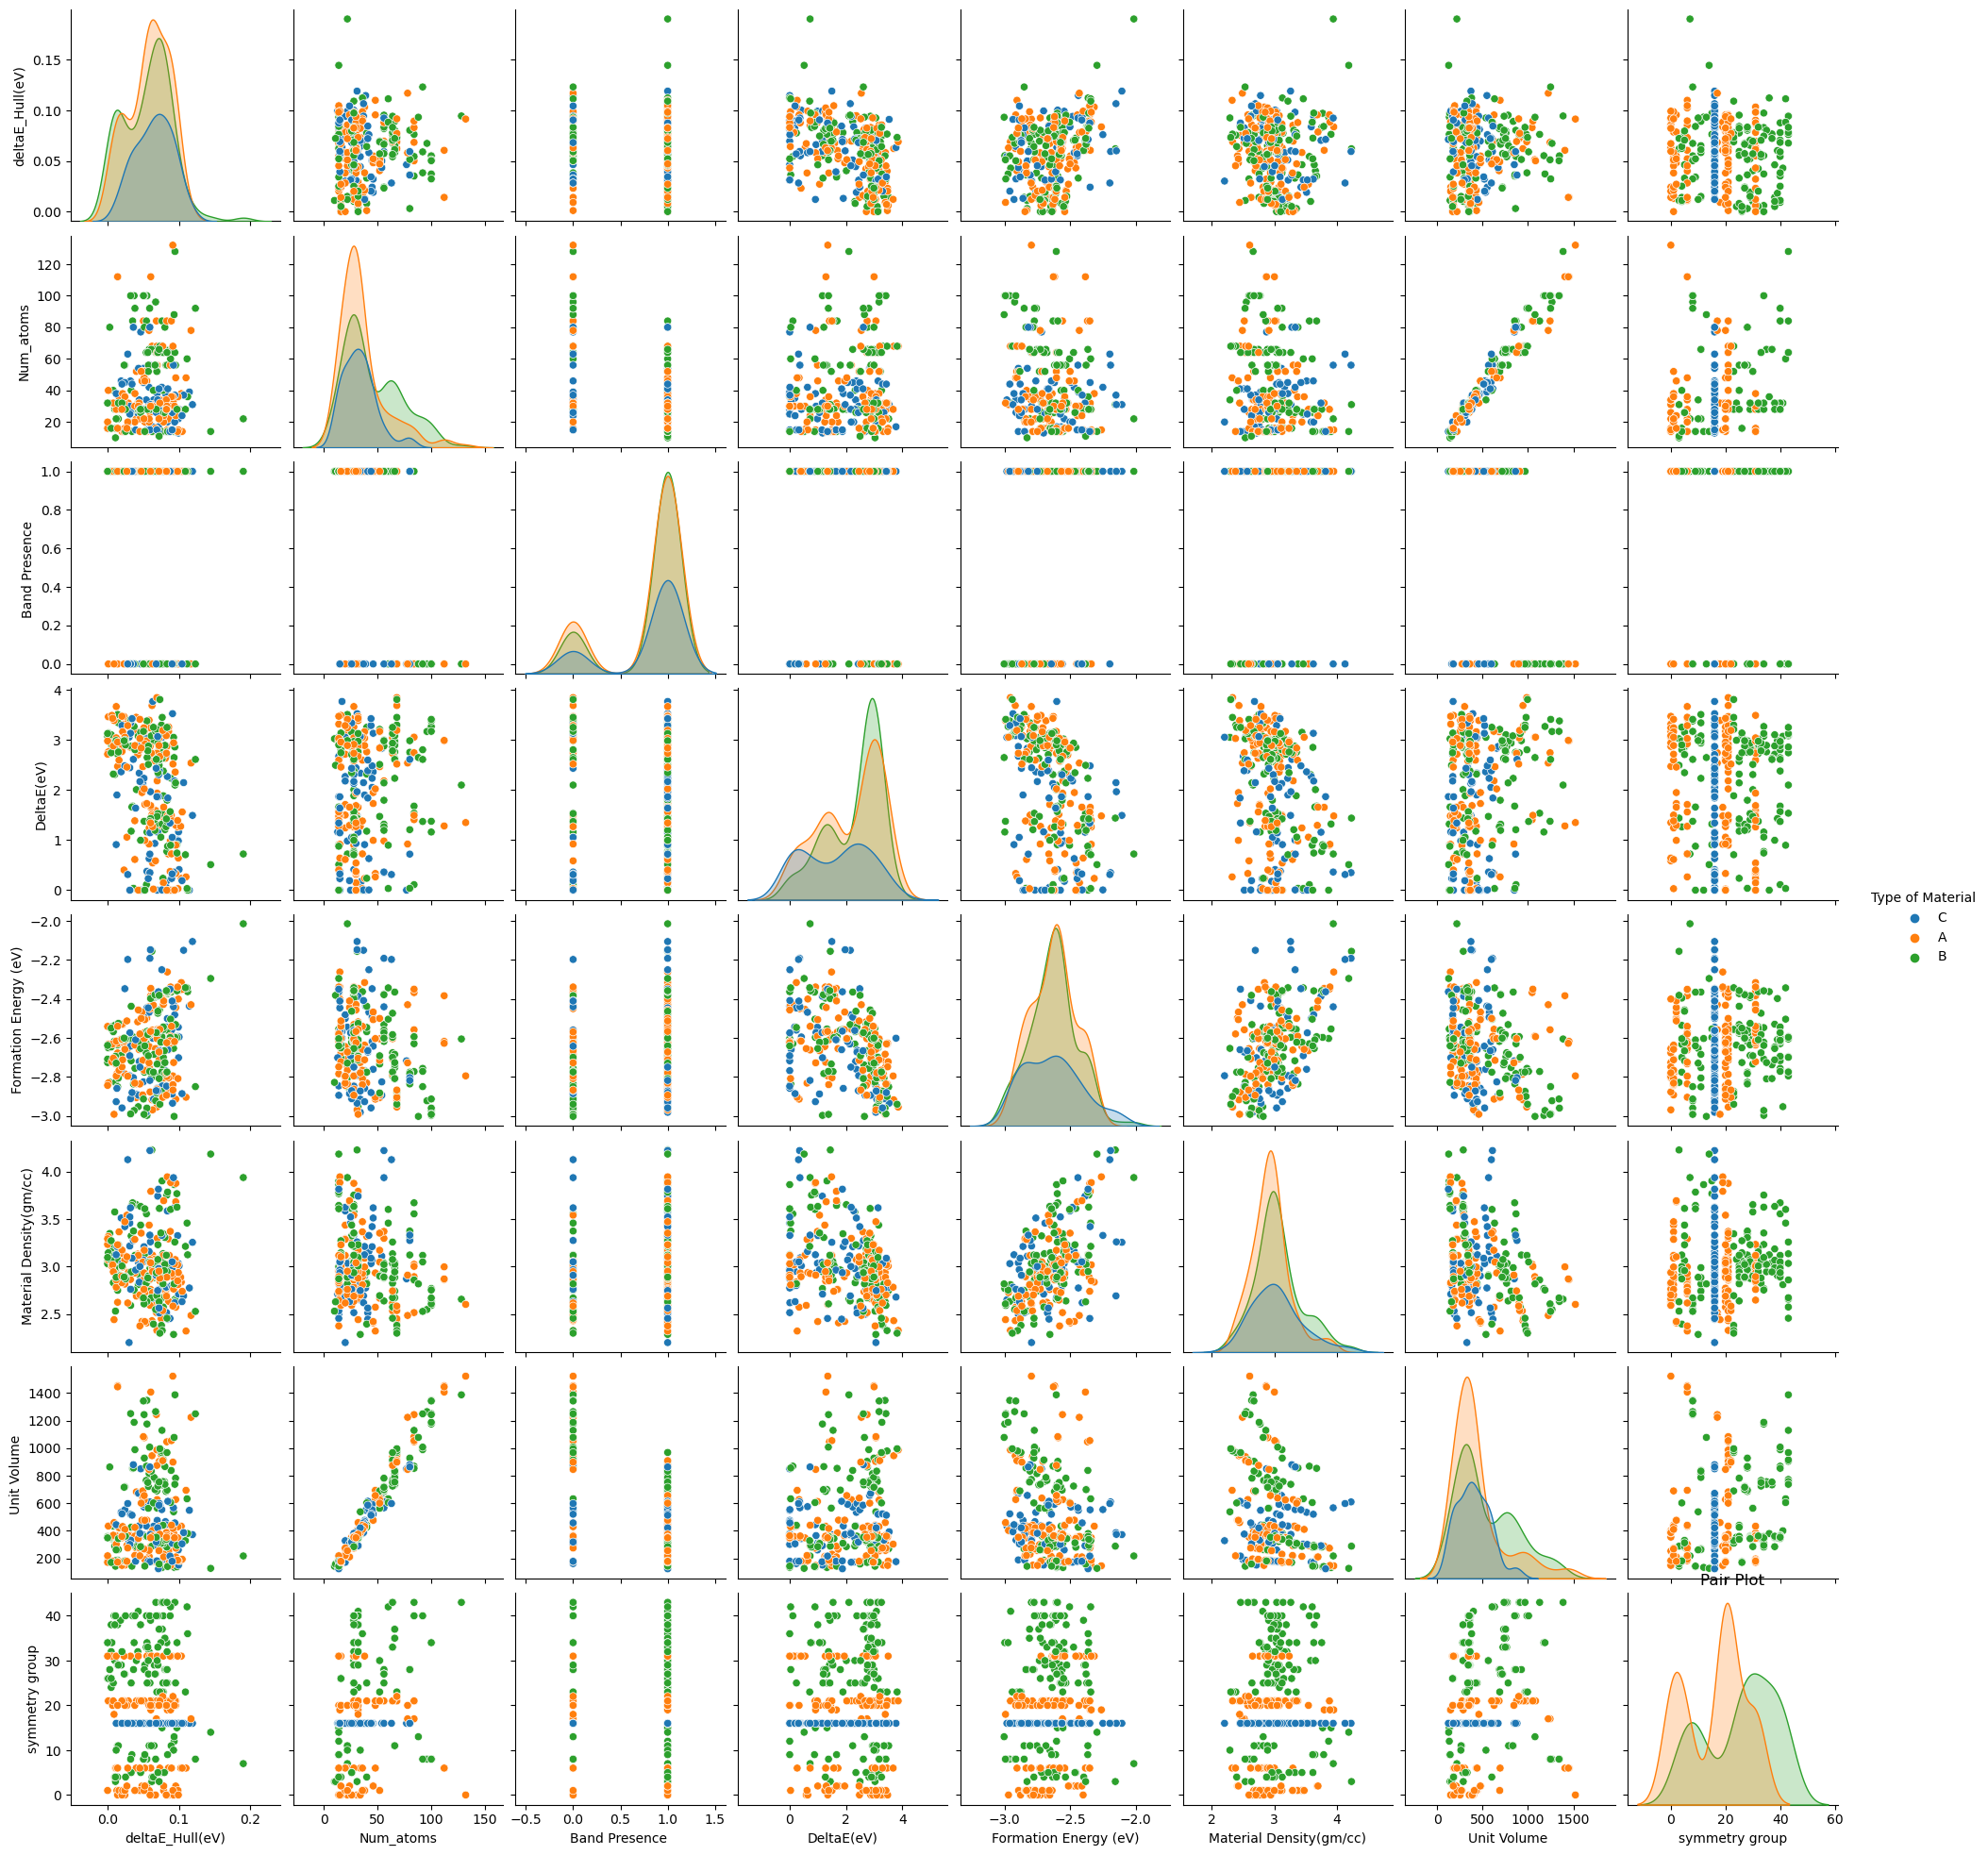

In [40]:
pairplot_data = pd.concat([X, y], axis=1)
sns.pairplot(pairplot_data, hue='Type of Material')
plt.title('Pair Plot')
plt.show()

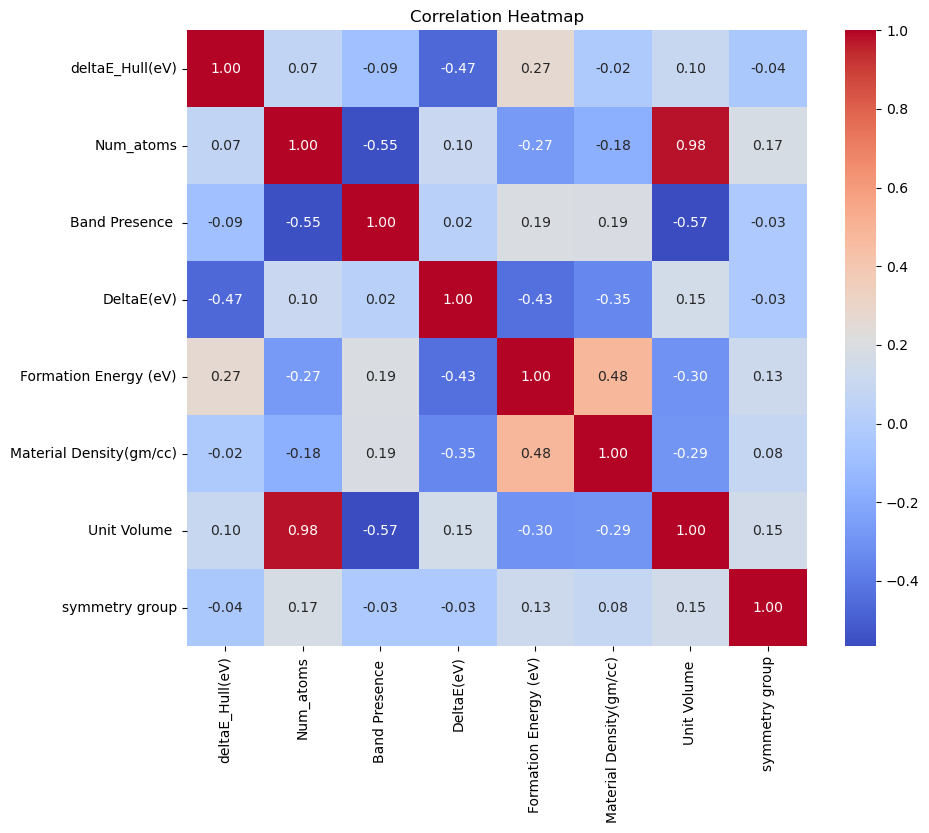

In [41]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

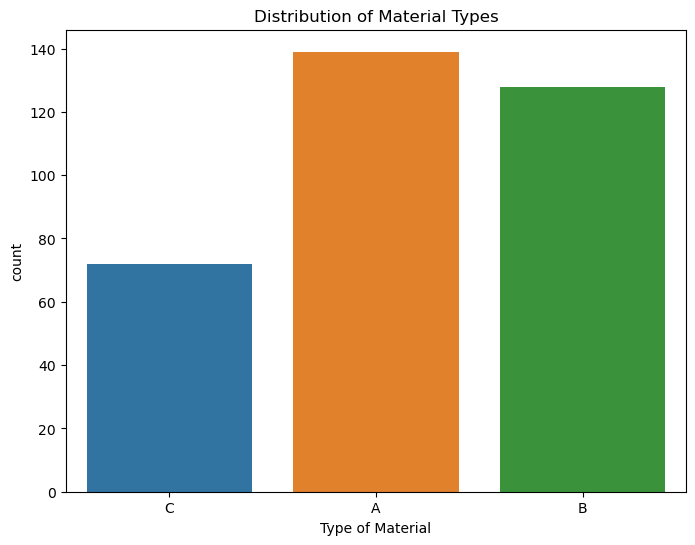

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type of Material', data=merged_df)
plt.title('Distribution of Material Types')
plt.show()

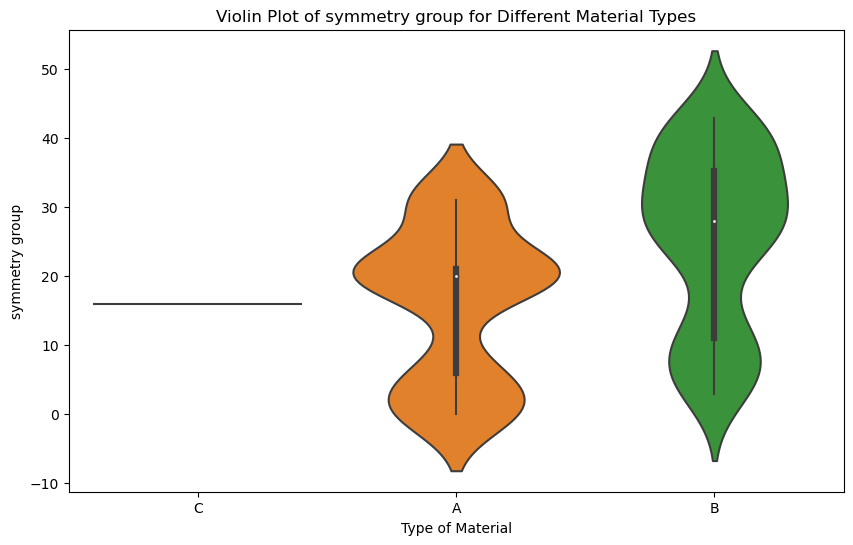

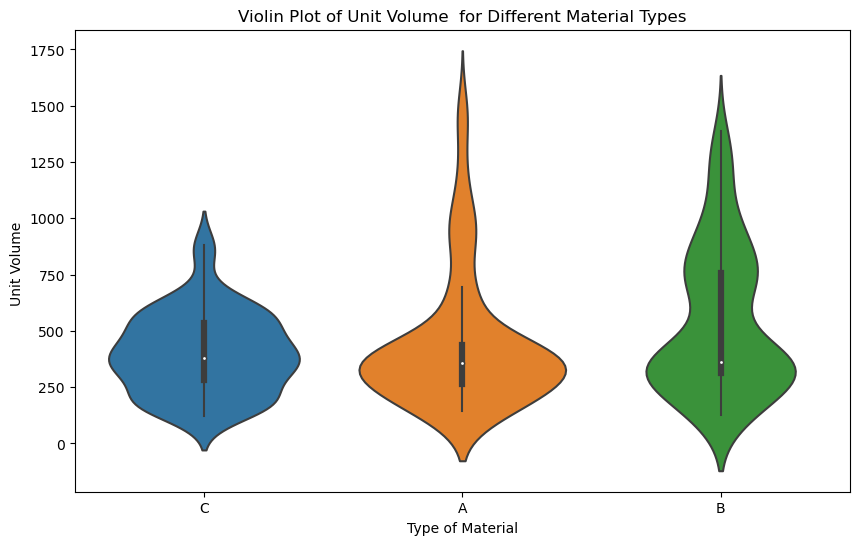

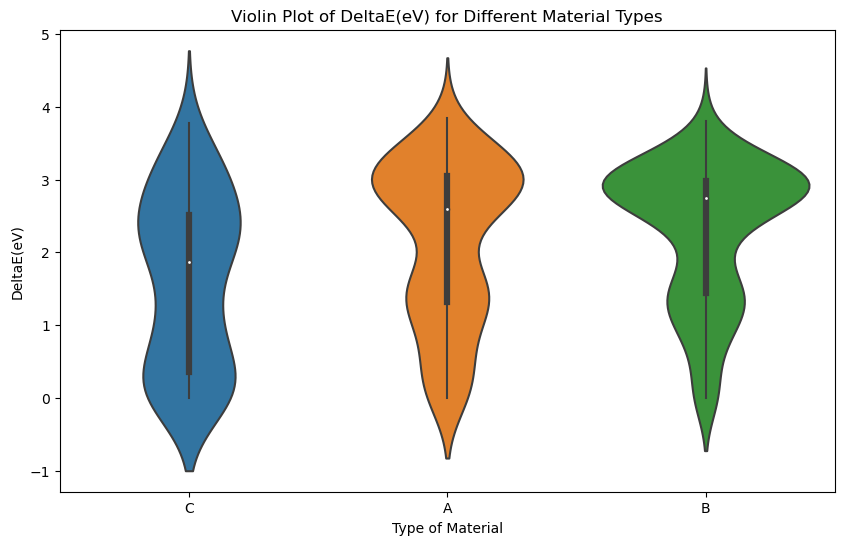

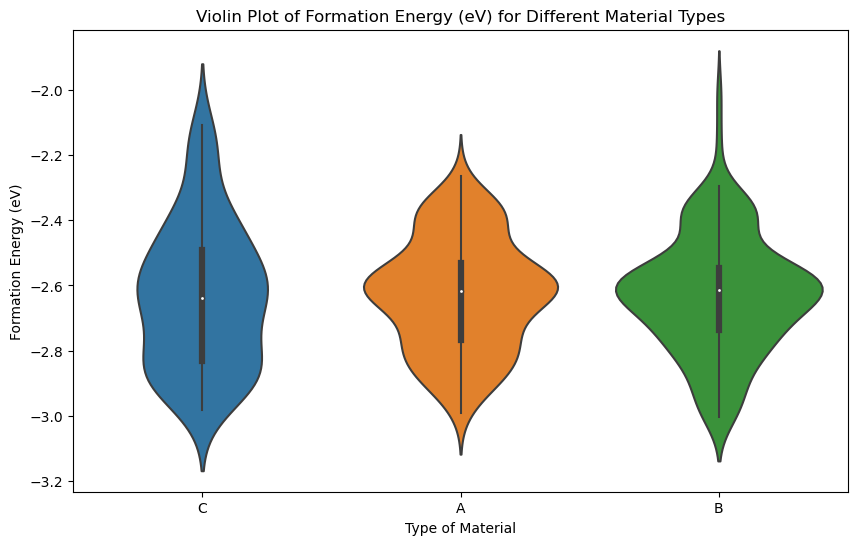

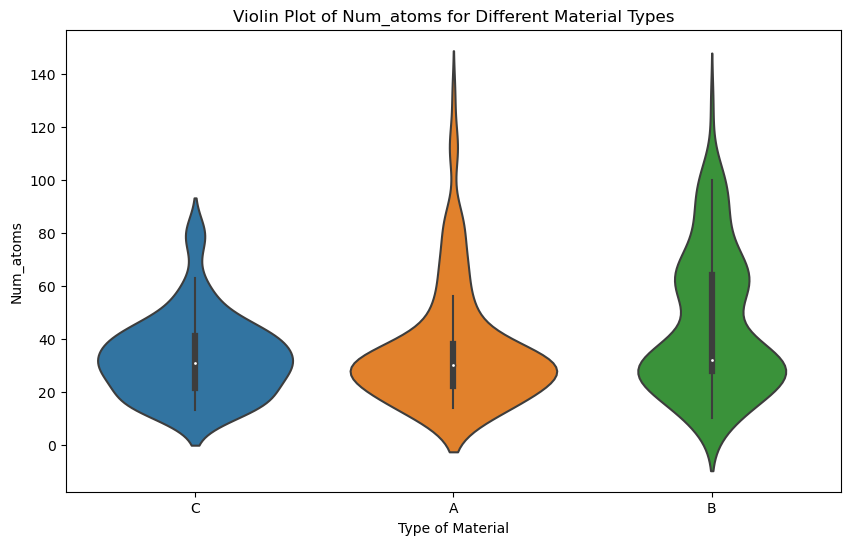

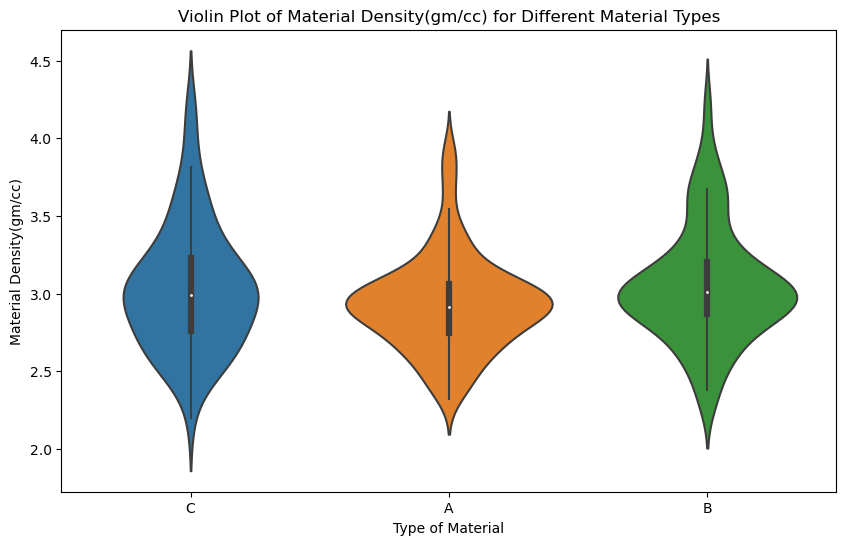

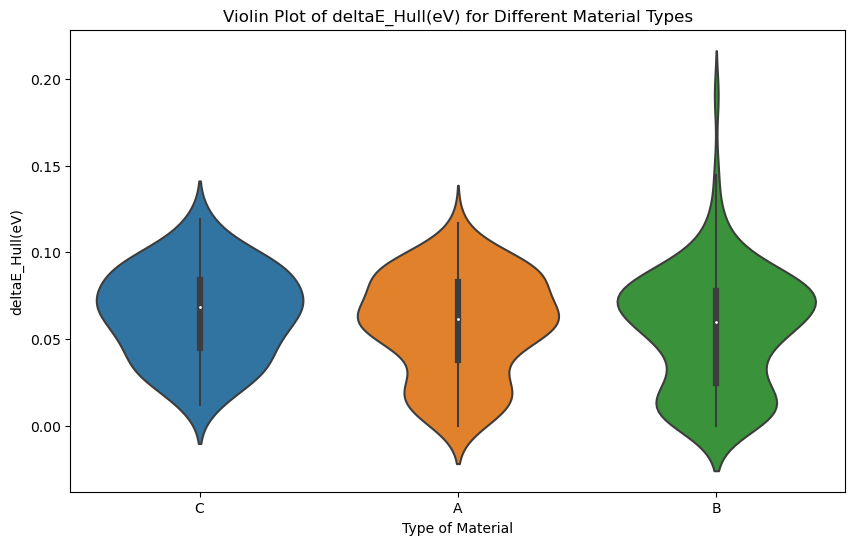

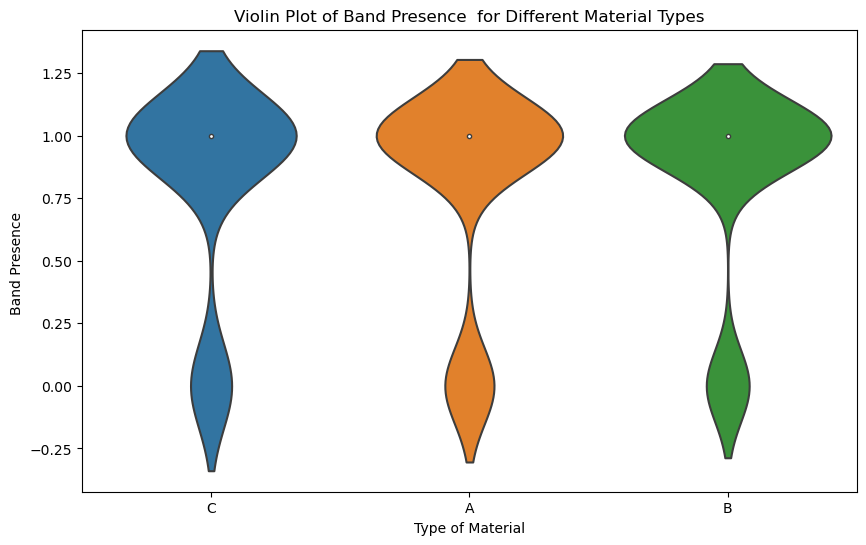

In [43]:
def plot_violin_for_feature(feature_name):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Type of Material', y=feature_name, data=merged_df)
    plt.title(f'Violin Plot of {feature_name} for Different Material Types')
    plt.show()

# List of features
features_to_plot = ['symmetry group', 'Unit Volume ', 'DeltaE(eV)', 'Formation Energy (eV)',
                    'Num_atoms', 'Material Density(gm/cc)', 'deltaE_Hull(eV)', 'Band Presence ']

# Plot violin plots for each feature
for feature in features_to_plot:
    plot_violin_for_feature(feature)

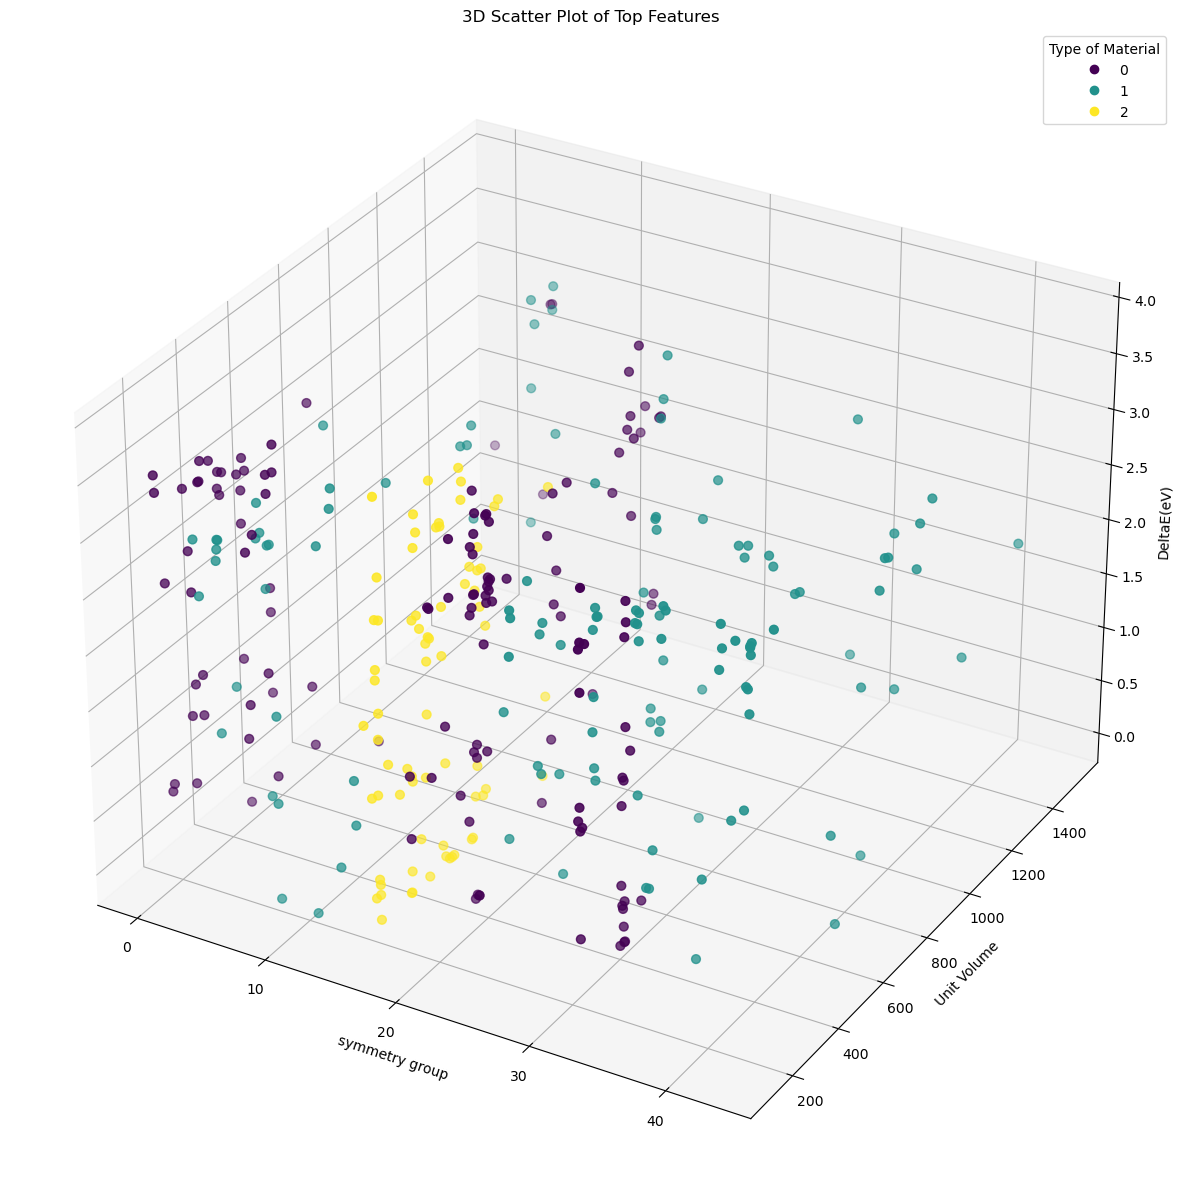

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Encode the 'Type of Material' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Select the top features based on their importance scores
top_features = ['symmetry group', 'Unit Volume ', 'DeltaE(eV)']


fig = plt.figure(figsize=(15, 80))
ax = fig.add_subplot(111, projection='3d')

feature1 = top_features[0]
feature2 = top_features[1]
feature3 = top_features[2]

scatter = ax.scatter(X[feature1], X[feature2], X[feature3], c=y_encoded, cmap='viridis', s=40)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Top Features')
ax.legend(*scatter.legend_elements(), title='Type of Material')  # Add legend

plt.show()

3. See if you implement transfer learning and hyperparameter tuning for your neural network model

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

warnings.filterwarnings("ignore", category=DeprecationWarning)


In [46]:

# Assuming y_train and y_test are your label arrays
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
# Creating a new model by adding a few additional layers on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Define a simple neural network for non-image data
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the original dataset
model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))

# Evaluate the model on the test set
accuracy_original = model.evaluate(X_test, y_test_encoded)[1]
print("Accuracy on original test set:", accuracy_original)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Perform hyperparameter tuning
param_grid = {
    'batch_size': [16, 32],
    'epochs': [5, 10],
    'learning_rate': [0.0001, 0.00001]
}

# Wrap the model in a KerasClassifier for use with GridSearchCV
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_fn=lambda: model, verbose=0)

# Create a GridSearchCV instance
grid_search = GridSearchCV(keras_classifier, param_grid, cv=3, scoring='accuracy')



Epoch 1/5
9/9 [==============================] - 1s 27ms/step - loss: 47.1838 - accuracy: 0.4207 - val_loss: 42.9047 - val_accuracy: 0.3676
Epoch 2/5
9/9 [==============================] - 0s 6ms/step - loss: 43.9210 - accuracy: 0.4207 - val_loss: 39.7108 - val_accuracy: 0.3676
Epoch 3/5
9/9 [==============================] - 0s 6ms/step - loss: 40.5495 - accuracy: 0.4207 - val_loss: 36.5599 - val_accuracy: 0.3676
Epoch 4/5
9/9 [==============================] - 0s 6ms/step - loss: 37.3046 - accuracy: 0.4207 - val_loss: 33.3803 - val_accuracy: 0.3676
Epoch 5/5
3/3 [==============================] - 0s 3ms/step - loss: 30.2885 - accuracy: 0.3676
Accuracy on original test set: 0.36764705181121826


In [47]:

# Define the function to create the Keras model
def create_model(learning_rate=0.0001):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with the create_model function
keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [5, 10],
    'learning_rate': [0.0001, 0.00001]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(keras_classifier, param_grid, cv=3, scoring='accuracy')

# Train the models with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best model and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy on test set with hyperparameter tuning:", accuracy_tuned)


3/3 [==============================] - 0s 3ms/step
Accuracy on test set with hyperparameter tuning: 0.36764705882352944
